## Setup

This guide was written in Python 3.5.

### Python and Pip

Download [Python](https://www.python.org/downloads/) and [Pip](https://pip.pypa.io/en/stable/installing/).

### Libraries

Let's install the modules we'll need for this tutorial. Open up your terminal and enter the following commands to install the needed python modules: 

```
pip3 install time
pip3 install sklearn
```

## Introduction

As we've covered before, there are two general categories that machine learning falls into. First is supervised learning, which we've covered with regression analysis, decision trees, and support vector machines. 

Recall that supervised learning is when your explanatory variables X come with an target variable Y. In contrast, unsupervised learning has no labels, so we a lot of X's with no Y's. In unsupervised learning all we can do is try our best to extract some meaning out of the data's underlying structure and do some checks to make sure that our methods are robust.

### Clustering 

One example of an unsupervised learning algorithm is clustering! Clustering is exactly what it sounds like. It's a way of grouping â€œsimilarâ€ data points together into clusters or subgroups, while keeping each group as distinct as possible. 

In this way data points belonging to different clusters will be quite different from each other, too. This is useful because oftentimes we'll come across datasets which exhibit this kind of grouped structure. Now, you might be thinking how are two points considered similar? That's a fair point and there are two ways in which we determine that: 1. Similarity 2. Cluster centroid. We'll go into detail on what these two things mean in the next section. 

### Similarity 

Intuitively, it makes sense that similar things should be close to each other, while different things should be farther apart. So to formalize the notion of similarity, we choose a distance metric (see below) that can quantify exactly how "close" two points are to each other. The most commonly used distance metric is the Euclidean distance which we should all be pretty familiar with (think: distance formula from middle school), and that's what we'll be using in our example today. We'll introduce some other distance metrics towards the end.

### Cluster Centroid

The cluster centroid is the most representative feature of the entire cluster. We say "feature" instead of "point" because the centroid may not necessarily be an existing point in the cluster. You can find it by averaging the values of all the points belonging to a specific group. But any relevant information about the cluster centroid tells us everything that we need to know about all other points in the same cluster.


## K Means Clustering

The k-means algorithm has a simple objective: given a set of data points, it tries to separate them out into k distinct clusters. It uses the same principle that we mentioned earlier: keep the data points within each cluster as similar as possible. You have to provide the value of k to the algorithm, so you should have a general idea of how many clusters you're expecting to see in your data. This sin't a precise science, but we can utilize visualization techniques to help us choose a proper k. 

So letâ€™s begin by doing just that. Remember that clustering is an unsupervised learning method, so weâ€™re never going to have a perfect answer for our final clusters, but we'll do our best to make sure that the results we get are reasonable and replicable. 

By replicable, we mean that our results can be arrived at by someone else using a different starting point. By reasonable, we mean that our results have to show some correlation with what we expect to encounter in real life.

The following image is just an example of the visualization we might get. Notice the three colors and the ways in which they could be separated, so we can set k to 3. Right now weâ€™re operating under the assumption that we know how many clusters we want, but weâ€™ll go into more detail about relaxing this assumption and how to choose the best possible k at the end of the workshop.

![alt text](https://camo.githubusercontent.com/6e540cb12555953bf43925fc20d46b6da1768017/687474703a2f2f707562732e7273632e6f72672f73657276696365732f696d616765732f525343707562732e65506c6174666f726d2e536572766963652e46726565436f6e74656e742e496d616765536572766963652e7376632f496d616765536572766963652f41727469636c65696d6167652f323031322f414e2f6332616e3136313232622f6332616e3136313232622d66332e676966 "Logo Title Text 1")

### Centroid Initialization

First we initialize three random cluster centroids. We initialize these clusters randomly because every iteration of k-means will "correct" them towards the right clusters. Since we are heading to a correct answer anyway, we don't really care about where we start.

As we explained before, these centroids are our â€œrepresentative pointsâ€ -- they contain all the information that we need about other points in the same cluster. It makes sense to think about these centroids as being the physical center of each cluster, so letâ€™s pretend like our randomly initialized cluster centers are the actual centroids, and group our points accordingly. Here we use our distance metric of choice, in this case the Euclidean distance. So for every single data point we have, we compute the two distances: one from the first cluster centroid, and the other from the second centroid. We assign this data point to the cluster at which the distance to the centroid is the smallest. This makes sense, because intuitively weâ€™re grouping points which are closer together.


### Cluster Formation

Now we have something that's starting to resemble three distinct clusters! But remember that we need to update the centroids that we started with -- we've just added in a bunch of new data points to each cluster, so we need our representative point, or our centroid, to reflect that.

So we'll just do quick averaging of all the values within each cluster and call that our new centroid. The new centroids are further "within" the data than the older centroids. Notice that we're not quite done yet -- we have some straggling points which don't really seem to belong in either cluster. Let's run another iteration of k-means and see if that separates out the clusters better. So recall that we're just computing the distances from the centroids for each data point, and re-assigning those that are closer to centroids of the other cluster.


### Iteration

We keep computing the centroids for every iteration using the steps before. After doing the few iterations, maybe you'll notice that the clusters don't change after a certain point. This actually turns out to be a good criterion for stopping the cluster iterations! At that point we're just wasting time and computational resources. So let's formalize this idea of a stopping criterion. We define a small value, &epsilon;, and we can terminate the algorithm when the change in cluster centroids is less than epsilon. This way, epsilon serves as a measure of how much error we can tolerate.


## Image Segmentation

Now we'll move onto a k-means example with images! 

Images often have a few dominant colors -- for example, the bulk of the image is often made up of the foreground color and the background color. In this example, we'll write some code that uses scikit-learn's k-means clustering implementation to find the what these dominant colors may be.

Once we know what the most important colors are in an image, we can compress (or "quantize") the image by re-expressing the image using only the set of k colors that we get from the algorithm. We'll be analyzing the two following images:

![alt text](https://github.com/adicu/AccessibleML/blob/master/datasets/kmeans/imgs/leo_bb.png?raw=true "Logo Title Text 1")

![alt text](https://github.com/adicu/AccessibleML/blob/master/datasets/kmeans/imgs/mario.png?raw=true "Logo Title Text 1")

We'll be using the following modules, so make sure to import them:


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.utils import shuffle
from time import time

Then we begin this exercise by reading in the image as a matrix and normalizing it:


In [3]:
img = mpimg.imread("./images/leo.png")
img = img * 1.0 / img.max()

An image is represented here as a three-dimensional array of floating-point numbers, which can take values from 0 to 1. If we look at `img.shape`, we'll find that the first two dimensions are x and y, and then the last dimension is the color channel. There are three color channels (one each for red, green, and blue). A set of three channel values at a single (x, y)-coordinate is referred to as a "pixel".


In [4]:
width, height, num_channels = img.shape
num_pixels = width * height

We're going to use a small random sample of 10% of the image to find our clusters:


In [5]:
num_sample_pixels = num_pixels / 10

Next we need to reshape the image data into a single long array of pixels (instead of a two-dimensional array of pixels) in order to take our sample.


In [6]:
img_reshaped = np.reshape(img, (num_pixels, num_channels))
img_sample = shuffle(img_reshaped, random_state=0)

Now that we have our data, let's construct our k-means object and feed it some data. It will find the best k clusters, as determined by a distance function. We're going to try to find the 20 colors which best represent the colors in the picture, so we set k to 20:


In [7]:
K = 20

Here, we're instantiating the kmeans object just as we have done with other machine learning models. the t0 is initialized to track how fast this algorithm takes to fit, which is the next step in this process. Lastly, we just print how long it took. Note: this code has to be run at the same time so we can get an accurate estimate of how long it took!


In [8]:
t0 = time()
kmeans = KMeans(n_clusters=K, random_state=0)
kmeans.fit(img_sample)
print("K-means clustering complete. Elapsed time: {} seconds".format(time() - t0))

K-means clustering complete. Elapsed time: 29.204871654510498 seconds


The centers of each of the clusters represents a color that was significant in the image. We can grab the values of these colors from kmeans.cluster_centers_. We can also call kmeans.predict() to match each pixel in the image to the closest color, which will let us know the size of each cluster (and also serve as a way to quantize the image)


In [9]:
kmeans.cluster_centers_

array([[0.47352126, 0.4333126 , 0.33970568],
       [0.15762323, 0.15962319, 0.13635601],
       [0.97820616, 0.851547  , 0.7020421 ],
       [0.7769936 , 0.5657364 , 0.40237826],
       [0.22065307, 0.21752134, 0.17951469],
       [0.01433402, 0.01279131, 0.01053292],
       [0.5757277 , 0.5976665 , 0.5364555 ],
       [0.47073758, 0.27312985, 0.16154227],
       [0.93344295, 0.77692485, 0.6101146 ],
       [0.2696851 , 0.13325799, 0.05825554],
       [0.9811786 , 0.98097503, 0.9798883 ],
       [0.51990443, 0.51853645, 0.43708193],
       [0.1752259 , 0.0797493 , 0.03129652],
       [0.59118366, 0.36948937, 0.23371188],
       [0.37247038, 0.35438848, 0.2845468 ],
       [0.87742   , 0.6750462 , 0.50762016],
       [0.3675533 , 0.19620758, 0.10451525],
       [0.29299122, 0.28302363, 0.23132144],
       [0.6666171 , 0.48361462, 0.33284456],
       [0.07846093, 0.06198788, 0.04569876]], dtype=float32)

As you can see, there are K cluster centers, each of which is a RGB color

Now, we can predict on sample pixels and see how long that takes:

In [10]:
t0 = time()
labels = kmeans.predict(img_reshaped)
print("k-means labeling complete. Elapsed time: {} seconds".format(time() - t0))

k-means labeling complete. Elapsed time: 0.1301729679107666 seconds


You should get an answer under a second! Next, we can construct a histogram of the points in each cluster:

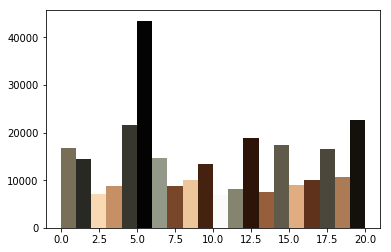

In [14]:
n, bins, patches = plt.hist(labels, bins=range(K+1))
for p, color in zip(patches, kmeans.cluster_centers_):
    plt.setp(p, 'facecolor', color)

As you might be able to tell from the above histogram, the most dominant color in the scene is the background color, followed by a large drop down to the foreground colors. This isn't all that surprising, since visually we can see that the space is mostly filled with the background color -- that's why it's called the "background".


In [15]:
Now, let's redraw the scene using only the cluster centers. This can be used for image compression, since we only need to store the index into the list of cluster centers and the colors corresponding to each center, rather than the colors corresponding to each pixel in the image.


SyntaxError: EOL while scanning string literal (<ipython-input-15-0762db8a10da>, line 1)

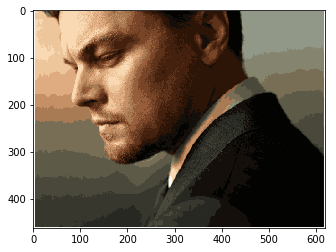

In [16]:
quantized_img = np.zeros(img.shape)
for i in range(width):
    for j in range(height):
        # We need to do some math here to get the correct
        # index position in the labels array
        index = i * height + j
        quantized_img[i][j] = kmeans.cluster_centers_[labels[index]]

quantized_imgplot = plt.imshow(quantized_img)

![alt text]( "Logo Title Text 1")

Notice that the image looks similar, but that the gradients are no longer as smooth and there are a few image artifacts scattered throughout. This is because we're only using the k best colors, which excludes the steps along the gradient.

## Limitations and Extensions

In our very first example, we started with k = 3 centroids. In case you're wondering how we arrived at this magic number and why, read on.

### Known Number of Centroids 

Sometimes, you may be in a situation where the number of clusters is provided to you beforehand. For example, you may be asked to categorize a vast range of different bodily actions to the three main subdivisions of the brain (cerebrum, cerebellum and medulla). 

Here you know that you are looking for three main clusters where each cluster will represent the part of the brain the data point is grouped to. So in this situation, you expect to have three centroids.

### Unknown Number of Centroids

However, there may be other situations while training in which you may not even know how many centroids to pick up from your data. Two extreme situations generally happen.

#### Extreme Cases

You could either end up making each point its own representative (a perfect centroid) at the risk of losing any grouping tendencies. This is usually called the overfitting problem. While each point perfectly represents itself, it gives you no general information about the data as a whole and will be unable to tell you anything relevant about new data that is coming in.

You could end up choosing only one centroid from all the data (a perfect grouping). Since there is no way to generalize an enormous volume of data to one point alone, this method loses relevant distinguishing features of the data.This is kind of like saying that all the people in the world drink water, so we can cluster them all by this feature. In Machine Learning terminology, this is called the underfitting problem. Underfitting implies that we are generalizing all of our data to a potentially trivial common feature.

#### Stability

Unfortunately, there's no easy way to determine the optimal value of k. It's a hard problem: we have to think about balancing out the number of clusters that makes the most sense for our data, while at the same time making sure that we don't overfit our model to the exact dataset that we have. There are a few ways that we can address this, and we'll briefly mention them here.

The most intuitive explanation is the idea of stability. If the clusters we obtain represent a true, underlying pattern in our data, it makes sense that the clusters shouldn't change very much on separate but similar samples. So if we randomly subsample or split our data into smaller parts and run the clustering algorithm again, the cluster memberships shouldn't drastically change. If they did, that'd be an indication that our clusters were too finely-tuned to the random noise in our data. Therefore, we can compute stability scores for a fixed value of k and observe which value of k gives us the most stable clusters. This idea of perturbation is really important for machine learning in general, and will come up time and time again.

We can also use penalization approaches, where we use different criterion such as AIC (Akaike Information Criterion) or BIC (Bayesian Information Criterion) to keep the value of k under control.
